In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
def reset_graph():
    tf.reset_default_graph()
    tf.set_random_seed(42)
    np.random.seed(42)

# Perceptrons

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['target_names', 'DESCR', 'data', 'feature_names', 'target'])

In [6]:
X = iris['data']
y = iris['target']

In [7]:
# only use two attributes: petal length, petal width
X = X[:, (2, 3)]

In [8]:
# turn the problem to a binary classification problem
y = (y == 0).astype(np.int)

Use Perceptron model from sklearn

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the
following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning
rate), and penalty=None (no regularization).

1. Logistic regression classifier: output is a class probability
2. Perceptron classifier: output is a specific class by placing a hard threshold

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather,
they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic
Regression over Perceptrons.

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
perceptron = Perceptron(random_state=42)
perceptron.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=42, shuffle=True,
      verbose=0, warm_start=False)

In [11]:
y_pred = perceptron.predict([[2, 1.5]])
y_pred

array([0])

In [12]:
perceptron.coef_

array([[-1.1, -1.3]])

Draw the decision boundary of using estimated perceptron coefficients

In [13]:
x1_range = [0, 4]
x2_range = [0, 8]

In [14]:
x1_s = np.linspace(x1_range[0], x2_range[1], num = 200).reshape(-1, 1)
x2_s = np.linspace(x2_range[0], x2_range[1], num = 200).reshape(-1, 1)

In [15]:
X1_mesh, X2_mesh = np.meshgrid(x1_s, x2_s)

1. flaten X1_mesh and X2_mesh from [200, 200] to [40000, 1] using ravel()
2. concatenate flaten X1 and X2

In [16]:
X_new = np.c_[X1_mesh.ravel(), X2_mesh.ravel()]

1. make predictions (40000, 1) using Perceptron built associated with X_new: (40000, 2)
2. reshape predictions make it has the same shape as X1_mesh

In [17]:
y_pred = perceptron.predict(X_new)
y_pred.shape

(40000,)

In [18]:
z = y_pred.reshape(X1_mesh.shape)
z.shape

(200, 200)

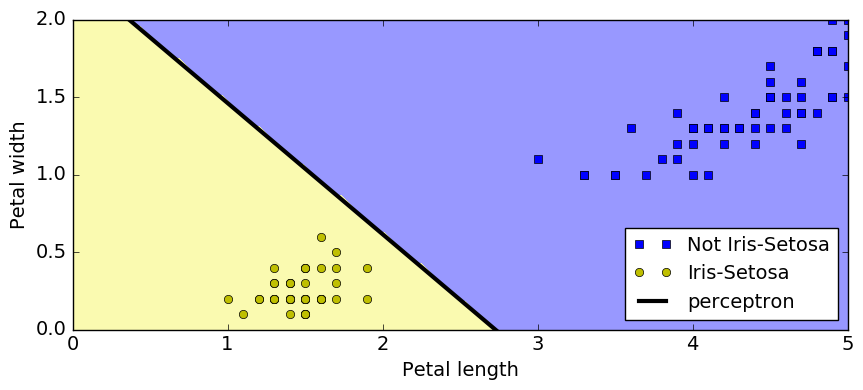

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(X1_mesh, X2_mesh, z, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)


# --- plot the perceptron line
a = -perceptron.coef_[0][0] / perceptron.coef_[0][1]
b = -perceptron.intercept_ / perceptron.coef_[0][1]
plt.plot([x1_range[0], x1_range[1]], [a * x1_range[0] + b, a * x1_range[1] + b], "k-", linewidth=3, label='perceptron')

plt.legend(loc="lower right", fontsize=14)
plt.xlim([0, 5])
plt.ylim([0, 2]);

## Activation functions

In [20]:
def relu(x):
    return np.maximum(0, x)

In [21]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

To ensure the gradient calculated analytically is correct, we use the numerical solution as a sanity check

In [22]:
def derivative(f, x, eps=0.000001):
    return (f(x + eps) - f(x - eps))/(2 * eps)

In [23]:
x = np.linspace(-5, 5, 200)

In [24]:
z_relu = [relu(val) for val in x]
z_sigmoid = [sigmoid(val) for val in x]

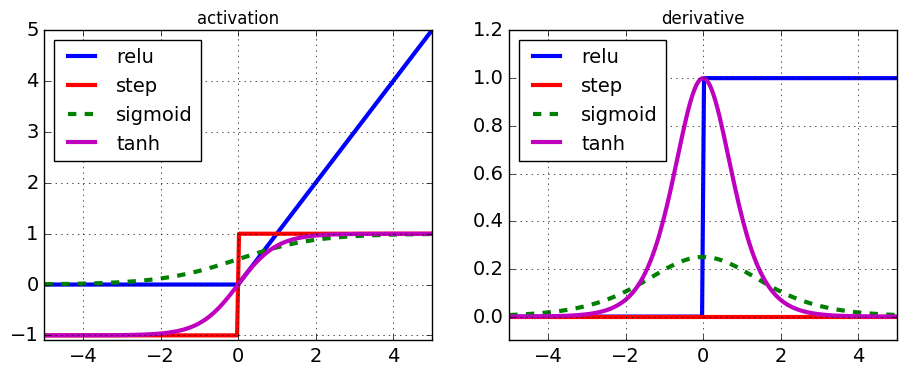

In [25]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(x, z_relu, 'b-', label='relu', linewidth = 3)
plt.plot(x, np.sign(x), 'r-', label='step', linewidth = 3)
plt.plot(x, z_sigmoid,'g--', label='sigmoid', linewidth = 3)
plt.plot(x, np.tanh(x), 'm-', label='tanh', linewidth = 3)
plt.grid(True)
plt.legend(loc='best')
plt.title('activation')
plt.xlim([-5, 5]);
plt.ylim([-1.1, 5]);

plt.subplot(122)
plt.plot(x, derivative(relu, x), 'b-', label='relu', linewidth = 3)
plt.plot(x, derivative(np.sign, x), 'r-', label='step', linewidth = 3)
plt.plot(x, derivative(sigmoid, x),'g--', label='sigmoid', linewidth = 3)
plt.plot(x, derivative(np.tanh, x), 'm-', label='tanh', linewidth = 3)
plt.grid(True)
plt.title('derivative')
plt.legend(loc='best')
plt.xlim([-5, 5]);
plt.ylim([-0.1, 1.2]);

The implementation of producing Figure.10-6 in book. The bias for first layer are [-1.5, -0.5] and weights are [1, 1], and the bias for the second layer is -0.5 and weights are [-1, 1].

In [26]:
def mlp_xor(x1, x2, activationFcn):
    z1 = activationFcn(-1.5 + x1 + x2)
    z2 = activationFcn(-0.5 + x1 + x2)
    z_in = -0.5 + (-1) * z1 + (1) * z2
    z_out = activationFcn(z_in)
    return z_out

In [27]:
def heavisize(x):
    return (x >= 0).astype(x.dtype)

In [28]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, relu)
z2 = mlp_xor(x1, x2, sigmoid)
z3 = mlp_xor(x1, x2, heavisize)
z4 = mlp_xor(x1, x2, np.tanh)

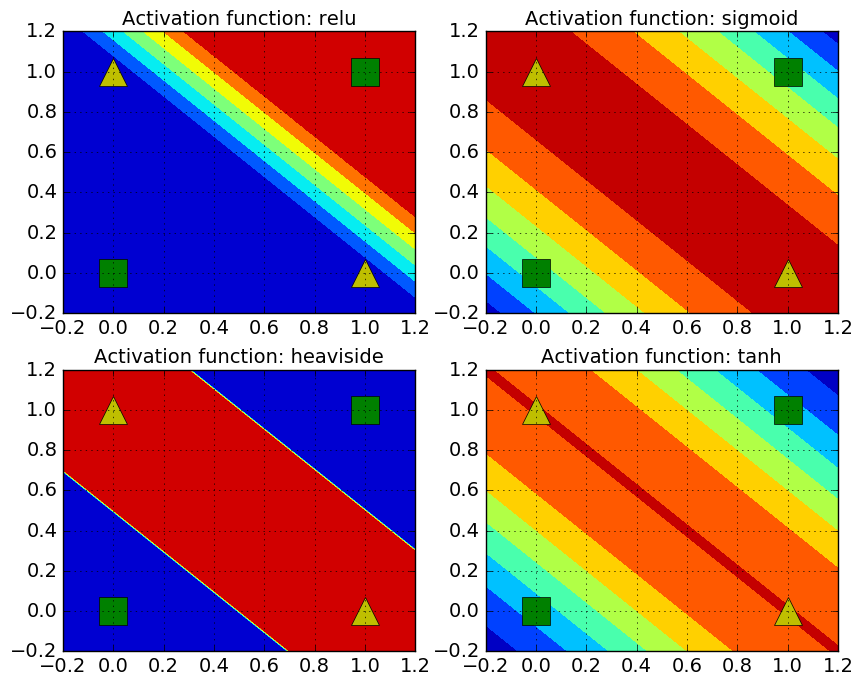

In [29]:
plt.figure(figsize=(10, 8));
plt.subplot(221)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: relu", fontsize=14)
plt.grid(True)
plt.contourf(x1,x2,z1);

plt.subplot(222)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)
plt.contourf(x1,x2,z2);

plt.subplot(223)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)
plt.contourf(x1,x2,z3);

plt.subplot(224)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: tanh", fontsize=14)
plt.grid(True)
plt.contourf(x1,x2,z4);

# feedforward neural network for MNIST

## tf implementation

In [30]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./data/")

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [40]:
X_train = mnist.train.images
X_test  = mnist.test.images
y_train = mnist.train.labels.astype(np.int)
y_test  = mnist.test.labels.astype(np.int)

configure tf to set random_seed

In [41]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)

In [42]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

In [61]:
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units = [300, 100], n_classes = 10, \
                                         feature_columns = feature_cols, config=config)

INFO:tensorflow:Using config: {'_environment': 'local', '_session_config': None, '_master': '', '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000011DE08D0>, '_save_checkpoints_steps': None, '_is_chief': True, '_num_ps_replicas': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_model_dir': 'C:\\Users\\xinliu\\AppData\\Local\\Temp\\tmpcwyvyj6p', '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_task_type': None, '_tf_random_seed': 42, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_evaluation_master': ''}


In [62]:
# Scikit learn wrapper for TensorFlow Learn Estimator.
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)

In [63]:
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\xinliu\AppData\Local\Temp\tmpcwyvyj6p\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.36404
INFO:tensorflow:global_step/sec: 460.396
INFO:tensorflow:step = 101, loss = 0.311432 (0.217 sec)
INFO:tensorflow:global_step/sec: 460.396
INFO:tensorflow:step = 201, loss = 0.265409 (0.217 sec)
INFO:tensorflow:global_step/sec: 462.526
INFO:tensorflow:step = 301, loss = 0.408733 (0.232 sec)
INFO:tensorflow:global_step/sec: 456.195
INFO:tensorflow:step = 401, loss = 0.244357 (0.204 sec)
INFO:tensorflow:global_step/sec: 449.224
INFO:tensorflow:step = 501, loss = 0.238858 (0.223 s

INFO:tensorflow:step = 7601, loss = 0.0131625 (0.212 sec)
INFO:tensorflow:global_step/sec: 505.037
INFO:tensorflow:step = 7701, loss = 0.00680886 (0.201 sec)
INFO:tensorflow:global_step/sec: 445.224
INFO:tensorflow:step = 7801, loss = 0.00376618 (0.222 sec)
INFO:tensorflow:global_step/sec: 487.322
INFO:tensorflow:step = 7901, loss = 0.0131479 (0.205 sec)
INFO:tensorflow:global_step/sec: 517.047
INFO:tensorflow:step = 8001, loss = 0.00631671 (0.193 sec)
INFO:tensorflow:global_step/sec: 531.346
INFO:tensorflow:step = 8101, loss = 0.0245089 (0.188 sec)
INFO:tensorflow:global_step/sec: 511.239
INFO:tensorflow:step = 8201, loss = 0.0208505 (0.199 sec)
INFO:tensorflow:global_step/sec: 432.133
INFO:tensorflow:step = 8301, loss = 0.04197 (0.232 sec)
INFO:tensorflow:global_step/sec: 380.496
INFO:tensorflow:step = 8401, loss = 0.0136715 (0.259 sec)
INFO:tensorflow:global_step/sec: 437.056
INFO:tensorflow:step = 8501, loss = 0.0110502 (0.229 sec)
INFO:tensorflow:global_step/sec: 521.337
INFO:tens

INFO:tensorflow:step = 15801, loss = 0.00153426 (0.230 sec)
INFO:tensorflow:global_step/sec: 563.684
INFO:tensorflow:step = 15901, loss = 0.000447847 (0.181 sec)
INFO:tensorflow:global_step/sec: 492.597
INFO:tensorflow:step = 16001, loss = 0.00656253 (0.203 sec)
INFO:tensorflow:global_step/sec: 463.386
INFO:tensorflow:step = 16101, loss = 0.0043496 (0.213 sec)
INFO:tensorflow:global_step/sec: 512.808
INFO:tensorflow:step = 16201, loss = 7.70298e-05 (0.194 sec)
INFO:tensorflow:global_step/sec: 470.356
INFO:tensorflow:step = 16301, loss = 0.00260926 (0.213 sec)
INFO:tensorflow:global_step/sec: 503.515
INFO:tensorflow:step = 16401, loss = 0.00155471 (0.199 sec)
INFO:tensorflow:global_step/sec: 485.905
INFO:tensorflow:step = 16501, loss = 0.0015937 (0.206 sec)
INFO:tensorflow:global_step/sec: 559.905
INFO:tensorflow:step = 16601, loss = 0.00472044 (0.179 sec)
INFO:tensorflow:global_step/sec: 517.594
INFO:tensorflow:step = 16701, loss = 0.00249327 (0.197 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:step = 23901, loss = 0.000976085 (0.194 sec)
INFO:tensorflow:global_step/sec: 569.447
INFO:tensorflow:step = 24001, loss = 0.00113664 (0.191 sec)
INFO:tensorflow:global_step/sec: 508.638
INFO:tensorflow:step = 24101, loss = 0.000741892 (0.185 sec)
INFO:tensorflow:global_step/sec: 423.7
INFO:tensorflow:step = 24201, loss = 0.000928554 (0.236 sec)
INFO:tensorflow:global_step/sec: 421.899
INFO:tensorflow:step = 24301, loss = 0.000218442 (0.237 sec)
INFO:tensorflow:global_step/sec: 452.473
INFO:tensorflow:step = 24401, loss = 0.00173174 (0.217 sec)
INFO:tensorflow:global_step/sec: 485.905
INFO:tensorflow:step = 24501, loss = 0.000569286 (0.206 sec)
INFO:tensorflow:global_step/sec: 573.38
INFO:tensorflow:step = 24601, loss = 0.000322807 (0.178 sec)
INFO:tensorflow:global_step/sec: 486.354
INFO:tensorflow:step = 24701, loss = 0.00111121 (0.202 sec)
INFO:tensorflow:global_step/sec: 480.3
INFO:tensorflow:step = 24801, loss = 0.00132868 (0.224 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:Loss for final step: 0.000402969.


SKCompat()

Prediction using the dnn model built by tf.contrib.learn.dnn

In [64]:
y_pred = dnn_clf.predict(X_test)

INFO:tensorflow:Restoring parameters from C:\Users\xinliu\AppData\Local\Temp\tmpcwyvyj6p\model.ckpt-40000


In [65]:
y_pred.keys()

dict_keys(['probabilities', 'classes', 'logits'])

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_dnn = accuracy_score(y_test, y_pred['classes'])
accuracy_dnn

0.98209999999999997

In [68]:
from sklearn.metrics import log_loss

In [69]:
log_loss_val = log_loss(y_test, y_pred['probabilities'])
log_loss_val

0.071960262984114065

In [74]:
dnn_clf.score(X_test, y_test)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-08-02-15:33:08
INFO:tensorflow:Restoring parameters from C:\Users\xinliu\AppData\Local\Temp\tmpcwyvyj6p\model.ckpt-40000
INFO:tensorflow:Finished evaluation at 2017-08-02-15:33:08
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.9821, global_step = 40000, loss = 0.0711633


{'accuracy': 0.98210001, 'global_step': 40000, 'loss': 0.071163259}

## build dnn by using plain tensorflow

In [119]:
n_inputs = 28 * 28

In [120]:
num_unit_hidden_1 = 300
num_unit_hidden_2 = 100

In [121]:
n_classes = 10

In [122]:
reset_graph()

In [123]:
X = tf.placeholder(dtype = tf.float32, shape = (None, n_inputs), name = 'x')
y = tf.placeholder(dtype = tf.int64, shape = (None), name = 'y')

1.Define a neuron layer function with name_scope

In [124]:
def neuron_layer(X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        # 1. get the dimension of attributes
        n_inputs = int(X.get_shape()[1])
        
        # 2. initialize weights
        std_dev = 2 / np.sqrt(n_inputs)
        initializer = tf.truncated_normal(shape=((n_inputs, n_neurons)), stddev = std_dev, dtype=tf.float32)
        W = tf.Variable(initializer, name='weights')
        
        # 3. padding the bias column
        b = tf.Variable(tf.zeros([n_neurons]), name='biases')
        
        # 4. matrix multiplication
        Z = tf.add(tf.matmul(X, W), b, name='score')
        
        # 5. feed scores to activation function
        if activation is not None:
            return activation(Z)
        else:
            return Z

2.Define the architecture of dnn with having two layers and relu as activation function

In [125]:
with tf.name_scope('dnn'):
    hidden_1 = neuron_layer(X, num_unit_hidden_1, name = 'hidden_1', activation=tf.nn.relu)
    hidden_2 = neuron_layer(hidden_1, num_unit_hidden_2, name = 'hidden_2', activation=tf.nn.relu)
    scores   = neuron_layer(hidden_2, n_classes, name = 'output')

3.Define the function to evaluate loss value and cost: 

Here, we use sparse_softmax_cross_entropy_with_logits(): it computes the cross entropy based on the “logits”
(i.e., the output of the network before going through the softmax activation function), and it expects labels
in the form of integers ranging from 0 to the number of classes minus 1 (in our case, from 0 to 9). This
will give us a 1D tensor containing the cross entropy for each instance. We can then use TensorFlow’s
reduce_mean() function to compute the mean cross entropy over all instances.

another function called softmax_cross_entropy_with_logits(), which takes labels in the form of one-hot vectors (instead of ints from 0 to the number
of classes minus 1).

In [130]:
with tf.name_scope('loss'):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=scores)
    loss = tf.reduce_mean(cross_entropy, name='loss')

4.Define an optimizer and object function to minimize

In [131]:
learning_rate = 0.01

In [132]:
with tf.name_scope('train'):
    optimzier = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train_obj = optimzier.minimize(loss_val)

5.Define a function to output a specific class and probabilities

In [137]:
with tf.name_scope('eval'):
    # k: An `int`. Number of top elements to look at for computing precision.
    # it returns a `Tensor` of type `bool`. Computed Precision at `k` as a `bool Tensor`.
    class_pred = tf.nn.in_top_k(scores, y, 1)
    
    # casts a bool tensor to a float32 variable
    accuracy = tf.reduce_mean(tf.cast(class_pred, tf.float32))

In [138]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [147]:
n_epochs = 40
batch_size = 50
n_batches = int(np.ceil(mnist.train.num_examples / batch_size))

6.Run the main loop to build FNN

In [150]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        # run mini-batch
        for batch_idx in range(n_batches):
            # retrive sub-training set for run mini-batch
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train_obj, feed_dict={X: X_batch, y: y_batch})
        # print-out the accuracy
        accuracy_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        accuracy_test  = accuracy.eval(feed_dict={X: mnist.test.images, y:mnist.test.labels})
        
        print(epoch, "Train accuracy:", accuracy_train, "Test accuracy:", accuracy_test)
    
    save_path = saver.save(sess, './stored_models/plain_tf_fnn.ckpt')

0 Train accuracy: 0.9 Test accuracy: 0.9117
1 Train accuracy: 0.92 Test accuracy: 0.9279
2 Train accuracy: 0.96 Test accuracy: 0.9409
3 Train accuracy: 0.98 Test accuracy: 0.9454
4 Train accuracy: 0.94 Test accuracy: 0.9504
5 Train accuracy: 0.96 Test accuracy: 0.9547
6 Train accuracy: 1.0 Test accuracy: 0.9565
7 Train accuracy: 0.98 Test accuracy: 0.9602
8 Train accuracy: 0.9 Test accuracy: 0.9614
9 Train accuracy: 0.96 Test accuracy: 0.964
10 Train accuracy: 1.0 Test accuracy: 0.9659
11 Train accuracy: 1.0 Test accuracy: 0.9669
12 Train accuracy: 1.0 Test accuracy: 0.9679
13 Train accuracy: 0.94 Test accuracy: 0.9694
14 Train accuracy: 1.0 Test accuracy: 0.9711
15 Train accuracy: 0.96 Test accuracy: 0.9709
16 Train accuracy: 1.0 Test accuracy: 0.9718
17 Train accuracy: 0.96 Test accuracy: 0.972
18 Train accuracy: 0.96 Test accuracy: 0.9732
19 Train accuracy: 1.0 Test accuracy: 0.9731
20 Train accuracy: 1.0 Test accuracy: 0.9739
21 Train accuracy: 0.98 Test accuracy: 0.974
22 Train ac

re-store the FNN built and use it to make prediction

In [158]:
with tf.Session() as sess:
    saver.restore(sess, './stored_models/plain_tf_fnn.ckpt')
    X_new_scaled = mnist.test.images[:20]
    scores = scores.eval(feed_dict={X:X_new_scaled})
    y_pred = np.argmax(scores, axis=1)

INFO:tensorflow:Restoring parameters from ./stored_models/plain_tf_fnn.ckpt


In [159]:
print('Predicted classes:', y_pred)
print('Actual classes:   ', mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [160]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [161]:
show_graph(tf.get_default_graph())

## Using dense() instead of neuron_layer()

Note: the book uses tensorflow.contrib.layers.fully_connected() rather than tf.layers.dense() (which did not exist when this chapter was written). It is now preferable to use tf.layers.dense(), because anything in the contrib module may change or be deleted without notice. The dense() function is almost identical to the fully_connected() function, except for a few minor differences:

1. several parameters are renamed: scope becomes name, activation_fn becomes activation (and similarly the _fn suffix is removed from other parameters such as normalizer_fn), weights_initializer becomes kernel_initializer, etc.

2. the default activation is now None rather than tf.nn.relu.

In [162]:
reset_graph()

In [168]:
X_train = mnist.train.images
X_test  = mnist.test.images
y_train = mnist.train.labels.astype(np.int)
y_test  = mnist.test.labels.astype(np.int)

### flow of building a FNN model

1. get information about number of inputs, number of classes, number of units in each layer
2. allocate placeholder to hold train data
3. build architecture layers -- (layer_1 + layer_2 + ... + fully connected layer) -- each layer is acheived by using layers.dense() -- (matrix muplication + activation + batch_norm + dropout in future)
4. define loss function for each instance, and reduce_mean to evaluate the overall loss
5. define optimizer and train_obj function
6. build eval function to make prediction to select the class with highest probability and then evaluate accuracy
7. define n_epochs, batch_size, n_batches
8. define global_variable_initializer and saver
9. build main loop to train FNN
10. restore the model built and make prediction using calculated score associated with np.argmax

In [199]:
# Step.1
n_inputs = 28 * 28
n_classes = 10
num_unit_hidden_1 = 300
num_unit_hidden_2 = 100
learning_rate = 0.01

In [200]:
# Step.2
X = tf.placeholder(dtype = tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(dtype = tf.int32, shape = (None), name = 'y')

In [201]:
# Step.3
with tf.name_scope('fnn'):
    hidden_1 = tf.layers.dense(X, num_unit_hidden_1, name = 'hidden_1', activation = tf.nn.relu)
    hidden_2 = tf.layers.dense(hidden_1, num_unit_hidden_2, name = 'hidden_2', activation = tf.nn.relu)
    scores   = tf.layers.dense(hidden_2, n_classes, name = 'scores', activation = None)

In [202]:
# Step.4
with tf.name_scope('loss'):
    # because we have 10 classes leading to a multi-class problem.
    # Hence we use sparse_softmax_cross_entropy to deal with target labels -- integer 0 to 9
    # another function called softmax_cross_entropy_with_logits(), 
    # which takes labels in the form of one-hot vectors (instead of ints from 0 to the number of classes minus 1).
    cross_entropy = tf.losses.sparse_softmax_cross_entropy(y, scores)
    loss = tf.reduce_mean(cross_entropy, name = 'loss')

In [203]:
# Step.5
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train_obj = optimizer.minimize(loss)

In [204]:
# Step.6
with tf.name_scope('eval'):
    # k: An `int`. Number of top elements to look at for computing precision.
    # it returns a `Tensor` of type `bool`. Computed Precision at `k` as a `bool Tensor`.
    class_pred = tf.nn.in_top_k(scores, y, 1)
    
    # casts a bool tensor to a float32 variable
    accuracy = tf.reduce_mean(tf.cast(class_pred, tf.float32))

In [205]:
# Step.7
n_epochs = 40
batch_size = 50
n_batches = int(np.ceil(mnist.train.num_examples / batch_size))

In [206]:
# Step.8
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [207]:
# Step.9
with tf.Session() as sess:
    n_inputs = int(X.get_shape()[1])
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_idx in range(n_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train_obj, feed_dict={X: X_batch, y: y_batch})
        
        accuracy_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        accuracy_test  = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print('Epoch ', epoch, 'train accuracy ', accuracy_train, 'test accuracy ', accuracy_test)
    
    save_path = saver.save(sess, './stored_models/plain_tf_fnn.ckpt')

Epoch  0 train accuracy  0.8976 test accuracy  0.9055
Epoch  1 train accuracy  0.919164 test accuracy  0.923
Epoch  2 train accuracy  0.9314 test accuracy  0.9321
Epoch  3 train accuracy  0.9376 test accuracy  0.9369
Epoch  4 train accuracy  0.943636 test accuracy  0.9428
Epoch  5 train accuracy  0.949455 test accuracy  0.9475
Epoch  6 train accuracy  0.953018 test accuracy  0.9521
Epoch  7 train accuracy  0.956836 test accuracy  0.9544
Epoch  8 train accuracy  0.958982 test accuracy  0.9544
Epoch  9 train accuracy  0.963145 test accuracy  0.9596
Epoch  10 train accuracy  0.9658 test accuracy  0.9631
Epoch  11 train accuracy  0.968655 test accuracy  0.9644
Epoch  12 train accuracy  0.970564 test accuracy  0.9659
Epoch  13 train accuracy  0.972127 test accuracy  0.9665
Epoch  14 train accuracy  0.973164 test accuracy  0.968
Epoch  15 train accuracy  0.974818 test accuracy  0.9694
Epoch  16 train accuracy  0.975836 test accuracy  0.97
Epoch  17 train accuracy  0.977382 test accuracy  0.9

In [212]:
# Step.10 restore FNN built and make prediction
with tf.Session() as sess:
    saver.restore(sess, './stored_models/plain_tf_fnn.ckpt')
    X_new_scaled = mnist.test.images[:20]
    scores_val = scores.eval(feed_dict={X: X_new_scaled})
    predictions = np.argmax(scores_val, axis = 1)

INFO:tensorflow:Restoring parameters from ./stored_models/plain_tf_fnn.ckpt


In [215]:
print('Predicted classes:', predictions)
print('Actual classes:   ', mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


# Exercise

Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a tf.summary.scalar() to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [313]:
reset_graph()

In [314]:
from tensorflow.examples.tutorials.mnist import input_data

In [315]:
mnist = input_data.read_data_sets('./data/')

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [316]:
X_train = mnist.train.images
X_test  = mnist.test.images
X_valid = mnist.validation.images

y_train = mnist.train.labels.astype(np.int)
y_test  = mnist.test.labels.astype(np.int)
y_valid = mnist.validation.labels.astype(np.int)

In [317]:
n_trains, n_attr = X_train.shape

In [318]:
n_inputs = 28 * 28
n_classes = 10

In [319]:
num_unit_hidden_1 = 300
num_unit_hidden_2 = 100
learning_rate = 0.01

In [320]:
X = tf.placeholder(dtype = tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(dtype = tf.int32, shape = (None), name = 'y')

In [321]:
with tf.name_scope('fnn'):
    hidden_1 = tf.layers.dense(X, num_unit_hidden_1, activation = tf.nn.relu, name = 'hidden_1')
    hidden_2 = tf.layers.dense(hidden_1, num_unit_hidden_2, activation = tf.nn.relu, name = 'hidden_2')
    scores   = tf.layers.dense(hidden_2, n_outputs, name = 'scores')

In [322]:
with tf.name_scope('loss'):
    cross_entropy = tf.losses.sparse_softmax_cross_entropy(y, scores)
    loss = tf.reduce_mean(cross_entropy, name = 'loss')
    loss_summary = tf.summary.scalar('loss_summary', loss)

In [323]:
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train_obj = optimizer.minimize(loss)

In [324]:
with tf.name_scope('eval'):
    y_pred = tf.nn.in_top_k(scores, y, 1)
    accuracy = tf.reduce_mean(tf.cast(y_pred, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [325]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [326]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(n_trains / batch_size))

In [327]:
import os

In [328]:
checkpoint_path = './stored_models/fnn_temp_model.ckpt'
checkpoint_epoch_path = checkpoint_path + '.epoch'
finalmodel_path = './stored_models/fnn_final_model.ckpt'

###### early stop

For this, we are going to need a validation set. Luckily, the dataset returned by TensorFlow's input_data() function (see above) is already split into a training set (60,000 instances, already shuffled for us), a validation set (5,000 instances) and a test set (5,000 instances). So we can easily define X_valid and y_valid:

In [329]:
best_loss = np.infty

In [330]:
epochs_without_progress = 0
max_epochs_without_progress = 50

In [331]:
with tf.Session() as sess:
    
    # 1. determine if the training process is interrupted
    if os.path.isfile(checkpoint_path):
        with open(checkpoint_epoch_path, 'rb') as f:
            start_epoch = int(f.read())
            saver.restore(sess, checkpoint_path)
            print('The training was interrupted and continue at epoch', start_epoch)
    else:
    
        # 2. initialize variables
        start_epoch = 0     
        sess.run(init)
        
    # 3. main loop over epochs within batches
    for epoch in range(start_epoch, n_epochs):
        for batch_idx in range(n_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train_obj, feed_dict={X: X_batch, y: y_batch})
            accuracy_valid, accuracy_summary_str, \
            loss_valid, loss_summary_str = sess.run([accuracy, accuracy_summary, loss, loss_summary], \
                                                    feed_dict={X: X_valid, y: y_valid})
        # 4. we check the training status every 5 epochs
        if epoch % 5 == 0:
            #accuracy_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
            #accuracy_test  = accuracy.eval(feed_dict={X: X_test, y: y_test})
            #print('Epoch ', epoch, 'Training accuracy ', accuracy_train, 'Test accuracy ', accuracy_test)
            
            print('Epoch:', epoch,\
                  '\tValidation accuracy: {:.3f}%'.format(accuracy_valid * 100), \
                  '\tLoss: {:.5f}'.format(loss_valid))
            
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, 'wb') as f:
                f.write(b'%d' %(epoch+1))
    
            # 5. if the current loss is lower than the one five iterations before, 
            # then we save the current model as the 'final' fnn
            if loss_valid < best_loss:
                saver.save(sess, finalmodel_path)
                best_loss = loss_valid
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print('early stop')
                    os.remove(checkpoint_epoch_path)
                    break
    # 6 remove the temporary checkpoint model
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Validation accuracy: 90.240% 	Loss: 0.35380
Epoch: 5 	Validation accuracy: 95.160% 	Loss: 0.17755
Epoch: 10 	Validation accuracy: 96.600% 	Loss: 0.12688
Epoch: 15 	Validation accuracy: 97.260% 	Loss: 0.10322
Epoch: 20 	Validation accuracy: 97.520% 	Loss: 0.09206
Epoch: 25 	Validation accuracy: 97.660% 	Loss: 0.08186
Epoch: 30 	Validation accuracy: 97.640% 	Loss: 0.07594
Epoch: 35 	Validation accuracy: 97.880% 	Loss: 0.07333
Epoch: 40 	Validation accuracy: 97.880% 	Loss: 0.07046
Epoch: 45 	Validation accuracy: 97.980% 	Loss: 0.06820
Epoch: 50 	Validation accuracy: 98.020% 	Loss: 0.06707
Epoch: 55 	Validation accuracy: 98.020% 	Loss: 0.06712
Epoch: 60 	Validation accuracy: 98.180% 	Loss: 0.06748
Epoch: 65 	Validation accuracy: 98.100% 	Loss: 0.06638
Epoch: 70 	Validation accuracy: 98.220% 	Loss: 0.06744
Epoch: 75 	Validation accuracy: 98.220% 	Loss: 0.06784
Epoch: 80 	Validation accuracy: 98.160% 	Loss: 0.06837
Epoch: 85 	Validation accuracy: 98.140% 	Loss: 0.06711
Epoch: 90 	V

In [332]:
with tf.Session() as sess:
    saver.restore(sess, finalmodel_path)
    scores_val = scores.eval(feed_dict={X: X_test})
    class_pred = np.argmax(scores_val, axis = 1)

INFO:tensorflow:Restoring parameters from ./stored_models/fnn_final_model.ckpt


In [338]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [336]:
accuracy_test = accuracy_score(class_pred, y_test)
print('accuracy:', accuracy_test)

accuracy: 0.9787


In [339]:
conf_mat = confusion_matrix(class_pred, y_test)

In [342]:
def plot_confusion_matrix(matrix):    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, cmap=plt.cm.gray)
    fig.colorbar(cax)

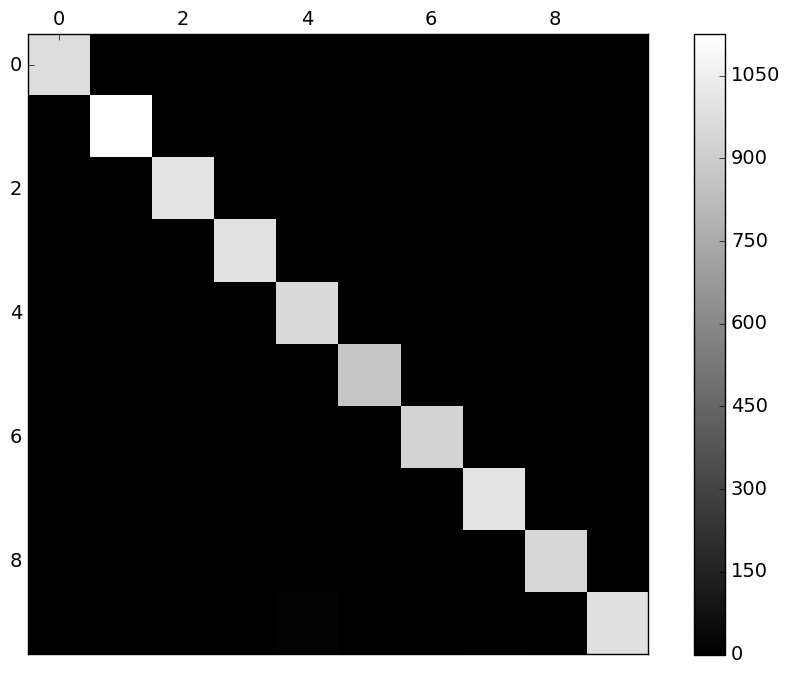

In [343]:
plot_confusion_matrix(conf_mat)

In [344]:
# 1. get sample numbers in row-wise
row_conf_mat_sum = conf_mat.sum(axis=1)

# 2. normalize the confusion matrix by dividing row_sum to each row
normalize_conf_mat = conf_mat / row_conf_mat_sum

# 3. fill diagonal elements with zeros
np.fill_diagonal(normalize_conf_mat, 0)

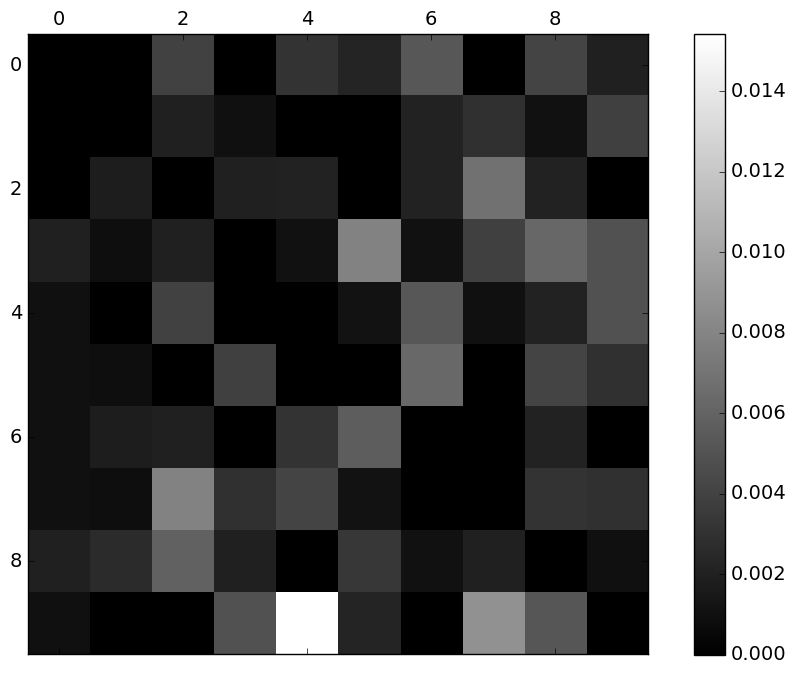

In [345]:
plot_confusion_matrix(normalize_conf_mat)